In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import History
from tensorflow.keras.optimizers import Adam


### Load the data

In [56]:
fake_news=pd.read_csv("ML KNN Overview Fake.txt", header=None)
true_news=pd.read_csv("ML KNN Overview Real.txt", header=None)

In [57]:
fake_news

,0
0,trump warns of vote flipping on machines
1,this election is not about trump its about a g...
2,more on trump populism and how it can be contr...
3,trump bollywood ad meant to sway indian americ...
4,dems could be up on charges for inciting trump...
...,...
1293,what happens if trump loses the election what ...
1294,latest poll shows trump with 4 point lead in f...
1295,breaking donald trump makes major clinton indi...
1296,no hate crimes have not intensified since trum...


## Set the columns name 'text'

In [58]:
fake_news.columns=['text']
true_news.columns=['text']

In [59]:
true_news['label']=1
fake_news['label']=0

## Combine the dataset

In [60]:
news_df=pd.concat([fake_news,true_news])

In [61]:
# Shuffle the dataset
news_df = news_df.sample(frac=1).reset_index(drop=True)

In [62]:

# Preprocessing
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

news_df['text'] = news_df['text'].apply(preprocess_text)

## Spliting the data

In [63]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(news_df['text'], news_df['label'], test_size=0.2, random_state=42)

## Vectorization

In [64]:
vectorizer= TfidfVectorizer(max_features=500)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Define function to plot training history


In [65]:
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'],label='Training loss')
    plt.plot(history.history['val_loss'],label='Validation loss')
    plt.legend()
    plt.title('Loss over epochs')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'],label='Training Accuracy')
    plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy over epochs')
    
    plt.show()

In [66]:
# Function to plot ROC curve
def plot_roc_curve(y_test,y_pred_prob):
    fpr, tpr, _ = roc_curve(y_test,y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr,tpr,color='darkorange',lw=2,label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [67]:
# Function to evaluate models
def evaluate_model(model, X_trai,y_train,X_test,y_test):
    model.fit(X_trai,y_train)
    y_pred=model.predict(X_test)
    y_pred_prob=model.predict_proba(X_test)[:,1]
    
    accuracy=accuracy_score(y_test,y_pred)
    cm=confusion_matrix(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    
    print(f'Accuracy: {accuracy}')
    print('Confusion Matrix')
    print(cm)
    print(f'Report of Confusion Matrix')
    print(report)
    plot_roc_curve(y_test,y_pred_prob)

## Logistic Regression 

Logistic Regression
Accuracy: 0.8119266055045872
Confusion Matrix
[[191  72]
 [ 51 340]]
Report of Confusion Matrix
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       263
           1       0.83      0.87      0.85       391

    accuracy                           0.81       654
   macro avg       0.81      0.80      0.80       654
weighted avg       0.81      0.81      0.81       654



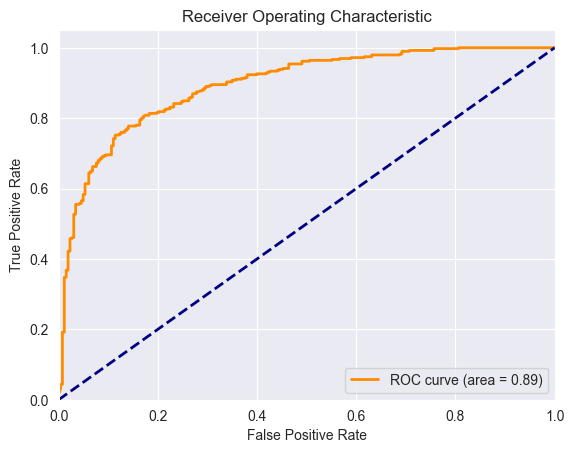

In [68]:
print("Logistic Regression")
logreg=LogisticRegression(max_iter=1000)
evaluate_model(logreg,X_train_tfidf,y_train,X_test_tfidf,y_test)

## Multinomial Naive Bayes

Multinomial Naive Bayes
Accuracy: 0.7951070336391437
Confusion Matrix
[[176  87]
 [ 47 344]]
Report of Confusion Matrix
              precision    recall  f1-score   support

           0       0.79      0.67      0.72       263
           1       0.80      0.88      0.84       391

    accuracy                           0.80       654
   macro avg       0.79      0.77      0.78       654
weighted avg       0.79      0.80      0.79       654



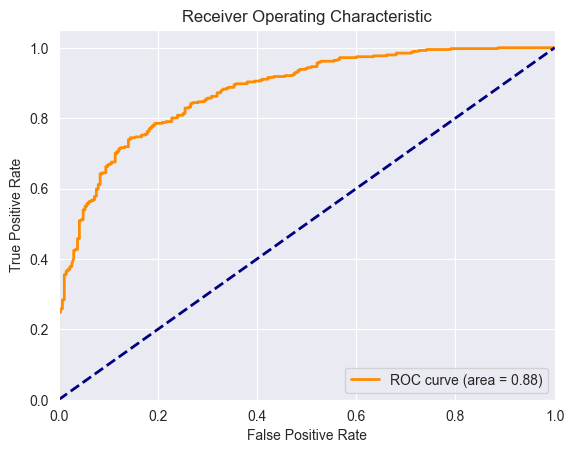

In [69]:
print("Multinomial Naive Bayes")
mnb=MultinomialNB()
evaluate_model(mnb,X_train_tfidf,y_train,X_test_tfidf,y_test)


## Support Vector Machine

Support Vector Machine
Accuracy: 0.8195718654434251
Confusion Matrix
[[200  63]
 [ 55 336]]
Report of Confusion Matrix
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       263
           1       0.84      0.86      0.85       391

    accuracy                           0.82       654
   macro avg       0.81      0.81      0.81       654
weighted avg       0.82      0.82      0.82       654



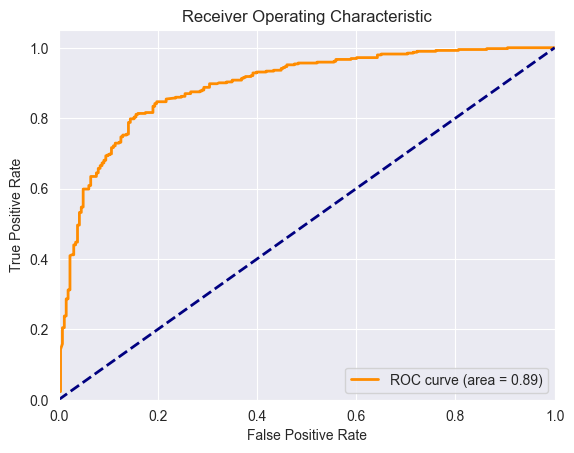

In [70]:
print("Support Vector Machine")
svc=SVC(probability=True)
evaluate_model(svc,X_train_tfidf,y_train,X_test_tfidf,y_test)

## Random Forest

Random Forest
Accuracy: 0.7966360856269113
Confusion Matrix
[[173  90]
 [ 43 348]]
Report of Confusion Matrix
              precision    recall  f1-score   support

           0       0.80      0.66      0.72       263
           1       0.79      0.89      0.84       391

    accuracy                           0.80       654
   macro avg       0.80      0.77      0.78       654
weighted avg       0.80      0.80      0.79       654



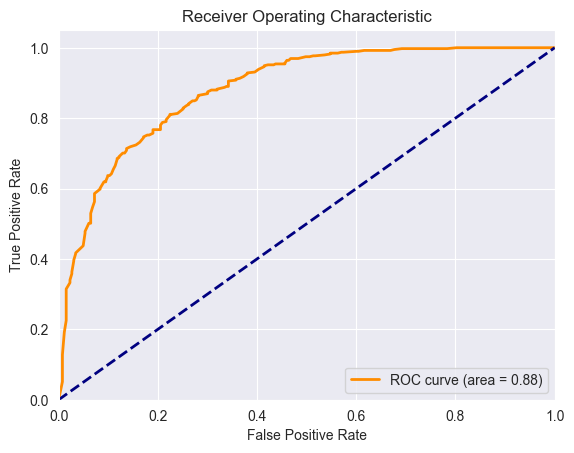

In [71]:
print("Random Forest")
rf=RandomForestClassifier(n_estimators=100)
evaluate_model(rf,X_train_tfidf,y_train,X_test_tfidf,y_test)

## Neural Network

Neural Network
Epoch 1/10


/Users/macbook/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5603 - loss: 0.6793 - val_accuracy: 0.6329 - val_loss: 0.6230
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6131 - loss: 0.6149 - val_accuracy: 0.7686 - val_loss: 0.5283
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8064 - loss: 0.4881 - val_accuracy: 0.8107 - val_loss: 0.3997
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8712 - loss: 0.3289 - val_accuracy: 0.8203 - val_loss: 0.3860
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8905 - loss: 0.2611 - val_accuracy: 0.8164 - val_loss: 0.3891
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9138 - loss: 0.2370 - val_accuracy: 0.8184 - val_loss: 0.3967
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9168 - loss: 0.2060 - val_accuracy: 0.8145 - val_loss: 0.4128
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9305 - loss: 0.1800 - val_accuracy: 0.8184 - val_loss: 0.4330
Ep

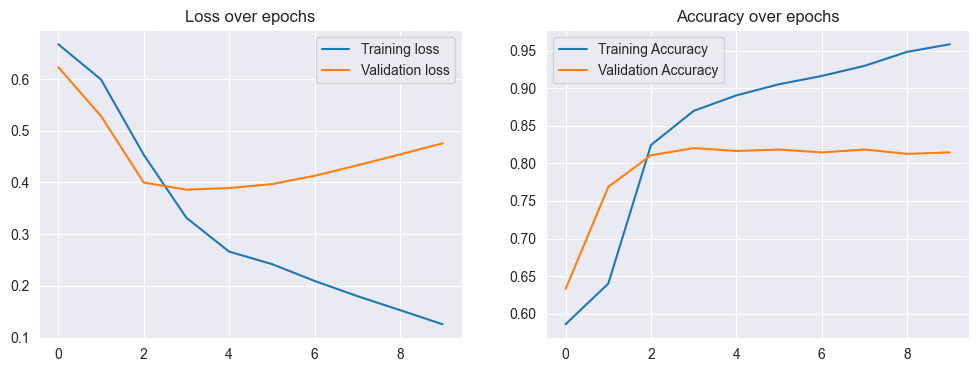

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy: 0.7935779816513762
Confusion Matrix: [[194  69]
 [ 66 325]]
Classification Report:               precision    recall  f1-score   support

           0       0.75      0.74      0.74       263
           1       0.82      0.83      0.83       391

    accuracy                           0.79       654
   macro avg       0.79      0.78      0.78       654
weighted avg       0.79      0.79      0.79       654



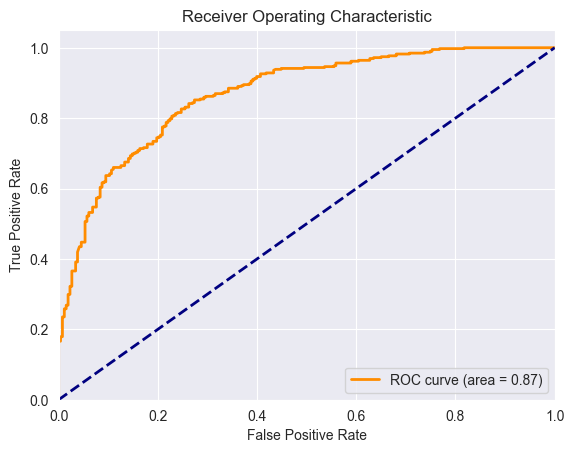

In [72]:
print("Neural Network")
def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(512,input_dim=input_dim,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
    return model

nn_model=create_nn_model(X_train_tfidf.shape[1])
history=History()
nn_model.fit(X_train_tfidf.toarray(),y_train,epochs=10, batch_size=128,validation_split=0.2,callbacks=[history])
plot_history(history)

# Evaluate Neural Network

y_pred_prob_nn=nn_model.predict(X_test_tfidf.toarray()).ravel()
y_pred_nn=(y_pred_prob_nn>0.5).astype(int)
print(f'Accuracy: {accuracy_score(y_test,y_pred_nn)}')
print(f'Confusion Matrix: {confusion_matrix(y_test,y_pred_nn)}')
print(f'Classification Report: {classification_report(y_test,y_pred_nn)}')
plot_roc_curve(y_test,y_pred_prob_nn)

In [73]:
# Compare models
results=pd.DataFrame(
    {
        'Model':['Logistic Regression','Multinomial Naive Bayes','Support Vector Machine','Random Forest','Neural Network'],
        'Accuracy':[accuracy_score(y_test, logreg.predict(X_test_tfidf)),
                    accuracy_score(y_test, mnb.predict(X_test_tfidf)),
                    accuracy_score(y_test, svc.predict(X_test_tfidf)),
                    accuracy_score(y_test, rf.predict(X_test_tfidf)),
                    accuracy_score(y_test, y_pred_nn)]
    }
)
print(results)

                     Model  Accuracy
0      Logistic Regression  0.811927
1  Multinomial Naive Bayes  0.795107
2   Support Vector Machine  0.819572
3            Random Forest  0.796636
4           Neural Network  0.793578


Training a neural network model to detect fake news:

### 1. Data loading and preprocessing

- **Load data:** Collect a dataset containing true and false articles, and label them (e.g. "true" or "false").
- **Data pre-processing:**
- Convert text to lower case for uniformity.
- Remove punctuation and numbers to clean data.

### 2. Data decomposition and vectorization

- **Split data:** Use function `train_test_split` to split data into training set and test set.
- **Vectorization:** Use TF-IDF method to convert text data into digital features (digital vector).

### 3. Identify and train the neural network model

- **Determine model:**
- Create a simple neural network model with two fully connected layers (Dense layers) and a Dropout layer to prevent overfitting.
- **Model training:**
- Use training data to train the model.
- Record changes in loss and accuracy during training.

### 4. Plot the training history

- **Plot:** Use the `plot_history` function to plot the change in precision and loss for both the training and validation sets.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import History
from tensorflow.keras.optimizers import Adam

In [75]:
fake_news=pd.read_csv('ML KNN Overview Fake.txt',header=None)
true_news=pd.read_csv('ML KNN Overview Real.txt',header=None)

In [76]:
# Set col names
fake_news.columns=['text']
true_news.columns=['text']
# Add labels
true_news['label']=1
fake_news['label']=0

In [77]:
news_df=pd.concat([true_news,fake_news])

In [78]:
news_df

,text,label
0,donald trump do you remember the year since he...,1
1,trump defends son over emails as moscow hits back,1
2,donald trump strategist says media wont easily...,1
3,anthony scaramucci who is donald trumps new co...,1
4,donald trumps mobile phone use worries securit...,1
...,...,...
1293,what happens if trump loses the election what ...,0
1294,latest poll shows trump with 4 point lead in f...,0
1295,breaking donald trump makes major clinton indi...,0
1296,no hate crimes have not intensified since trum...,0


In [79]:
# Shuffle the dataset
news_df=news_df.sample(frac=1).reset_index(drop=True)

In [80]:
# Preprocess text
def preprocess_text(text):
    # Lower text
    text = text.lower()
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

news_df['text'] = news_df['text'].apply(preprocess_text)

# Split data
X_train,X_test,y_train,y_test=train_test_split(news_df['text'],news_df['label'],test_size=0.2,random_state=42)

In [81]:
# Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## Create a neural network model

Epoch 1/10


/Users/macbook/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5874 - loss: 0.6805 - val_accuracy: 0.6138 - val_loss: 0.6364
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5945 - loss: 0.6081 - val_accuracy: 0.7323 - val_loss: 0.5209
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8780 - loss: 0.3971 - val_accuracy: 0.8184 - val_loss: 0.3756
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9491 - loss: 0.1704 - val_accuracy: 0.8356 - val_loss: 0.3686
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9820 - loss: 0.0706 - val_accuracy: 0.8356 - val_loss: 0.4018
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9924 - loss: 0.0295 - val_accuracy: 0.8317 - val_loss: 0.4372
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9981 - loss: 0.0149 - val_accuracy: 0.8203 - val_loss: 0.4982
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9991 - loss: 0.0072 - val_accuracy: 0.8260 - val_loss: 0.

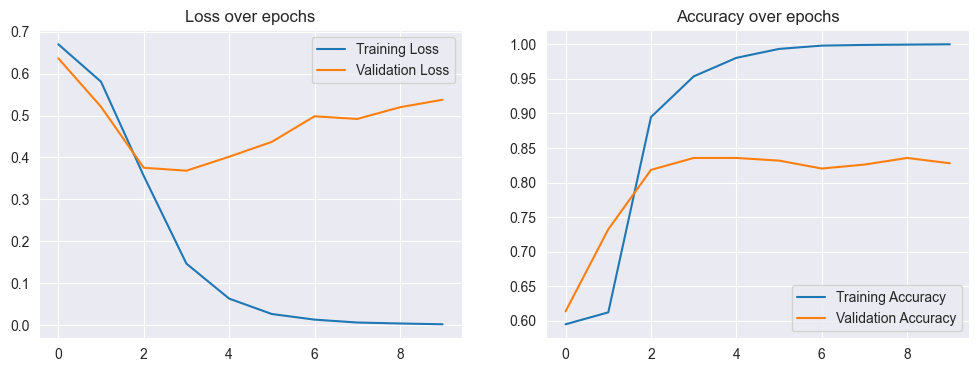

In [82]:
def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(512, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

nn_model=create_nn_model(X_train_tfidf.shape[1])
history=History()
# Fit the model
nn_model.fit(X_train_tfidf.toarray(),y_train,epochs=10, batch_size=128,validation_split=0.2,callbacks=[history])

# Plotting
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'],label='Training Loss')
    plt.plot(history.history['val_loss'],label='Validation Loss')
    plt.legend()
    plt.title('Loss over epochs')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'],label='Training Accuracy')
    plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy over epochs')
    
    plt.show()

plot_history(history)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.8211009174311926
Confusion Matrix: [[199  57]
 [ 60 338]]
Classification Report:               precision    recall  f1-score   support

           0       0.77      0.78      0.77       256
           1       0.86      0.85      0.85       398

    accuracy                           0.82       654
   macro avg       0.81      0.81      0.81       654
weighted avg       0.82      0.82      0.82       654



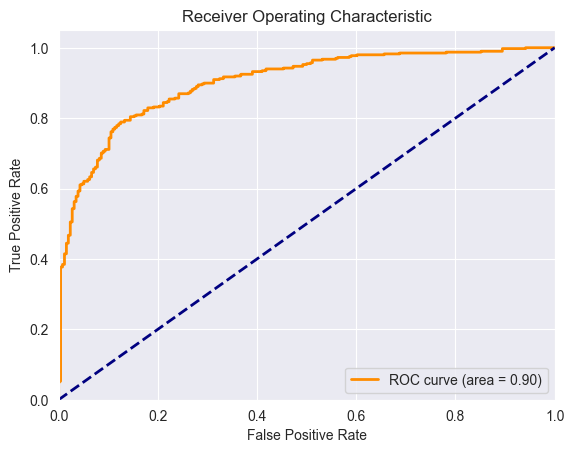

In [83]:
# Evaluate Neural Network

y_pred_prob_nn=nn_model.predict(X_test_tfidf.toarray()).ravel()
y_pred_nn=(y_pred_prob_nn>0.5).astype(int)
print(f'Accuracy: {accuracy_score(y_test,y_pred_nn)}')
print(f'Confusion Matrix: {confusion_matrix(y_test,y_pred_nn)}')
print(f'Classification Report: {classification_report(y_test,y_pred_nn)}')
plot_roc_curve(y_test,y_pred_prob_nn)